In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

import plotly.express as px
import plotly.graph_objects as go
import ipywidgets as widgets

from axisproj import optimal, objective, make_basis

In [2]:
%load_ext autoreload

# For retina displays
%config InlineBackend.figure_format ='retina'

In [3]:
def prepare(data, method, knn):
    if method == 'lpp':
        X = data.T
        obj = objective.LPPObjective(knn=12,sigma=0.3)
        labs = None
    elif method == 'lde':
        X = data[:, :-1].T
        labs = np.ravel(data[:,-1])
        obj = objective.LDEObjective(knn=12, labs=labs)
    elif method == 'pca':
        X = data.T
        obj = objective.PCAObjective()
        labs = None
    else:
        print(f'unknown method: {method}')
        return
    
    X = StandardScaler().fit_transform(X.T).T
    
    return X, obj, labs

In [4]:
def show(V, colors=None, hist=None):
    fig, (f1, f2)= plt.subplots(1,2)
    Y = X.T.dot(V)
    if colors is None:
        f1.scatter(Y[:,0],Y[:,1],marker='o',c=X[51,:].T, cmap=plt.get_cmap('viridis'))
    else:
        f1.scatter(Y[:,0],Y[:,1],marker='o',c=colors)
#     plt.xlabel(f'{V[:,0]}')
#     plt.ylabel(f'{V[:,1]}')
    if hist is not None:
        f2.hist(hist)
    plt.show()

In [5]:
knn = 12
c = ['r', 'g', 'b']

In [6]:
datasets = dict(
    wine='lde',
    seawater='lpp',
    climate='lde'
)

In [7]:
name = 'seawater'
data = pd.read_csv('../data/'+name+'.csv')
X, obj, labs = prepare(data.values, datasets[name], knn)

In [8]:
%%time
lp, ap = optimal(X, obj, normalize=False)
print(len(lp), len(ap))

8 6
CPU times: user 18.9 s, sys: 6.63 s, total: 25.5 s
Wall time: 10.4 s


In [71]:
def show(V, colors=None, hist=None):
    fig, (f1, f2)= plt.subplots(1,2)
    Y = X.T.dot(V)
    if colors is None:
        f1.scatter(Y[:,0],Y[:,1],marker='o',c=X[51,:].T, cmap=plt.get_cmap('viridis'))
    else:
        f1.scatter(Y[:,0],Y[:,1],marker='o',c=colors)
#     plt.xlabel(f'{V[:,0]}')
#     plt.ylabel(f'{V[:,1]}')
    if hist is not None:
        f2.hist(hist)
    plt.show()

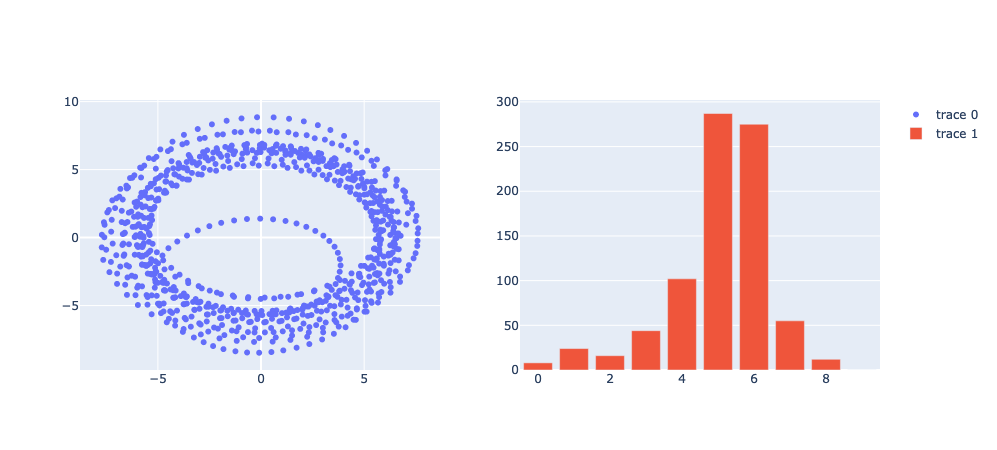

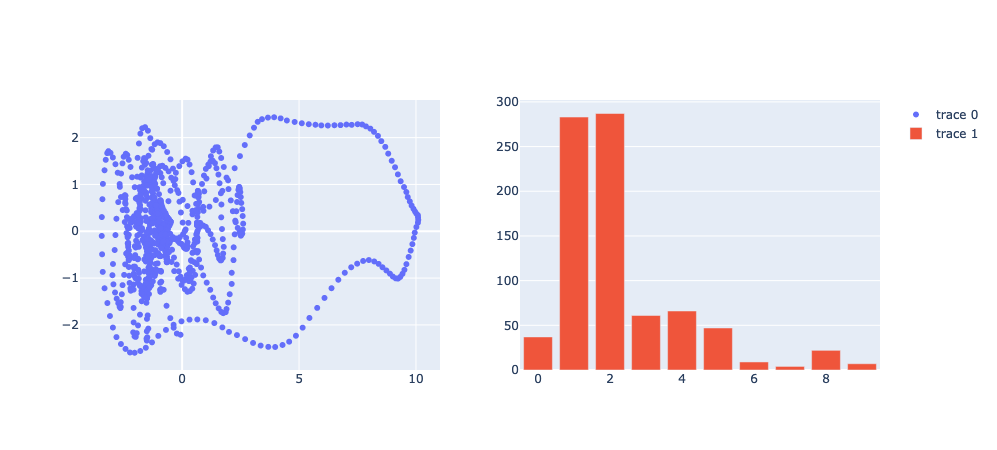

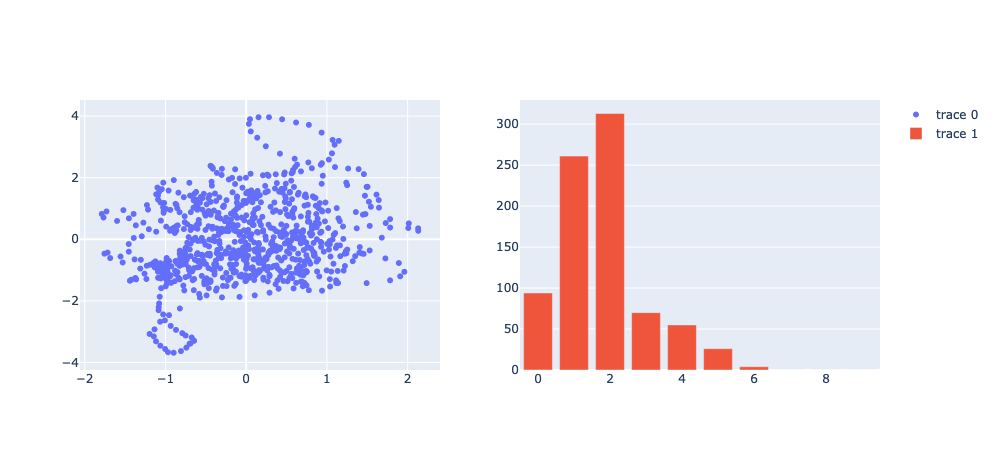

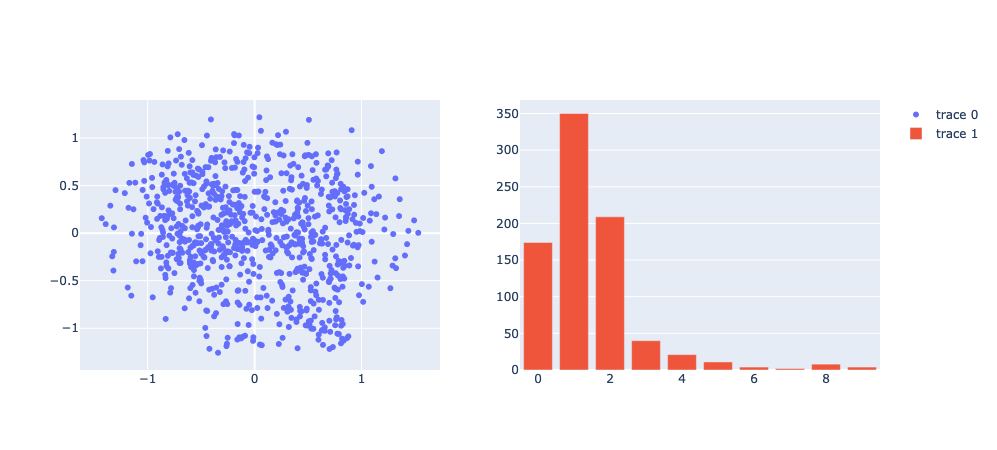

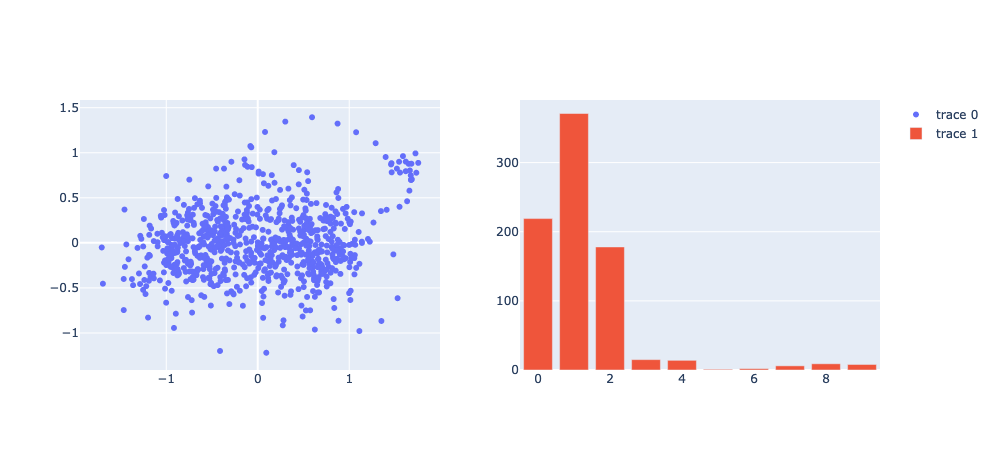

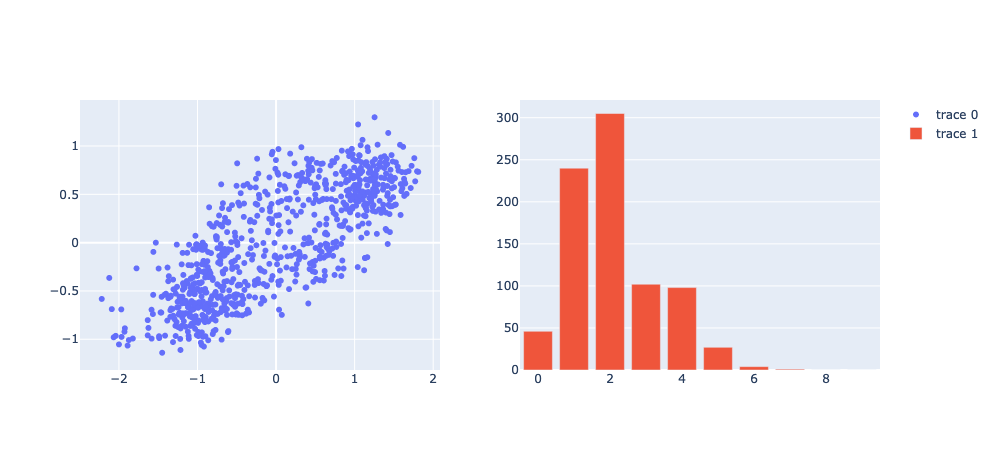

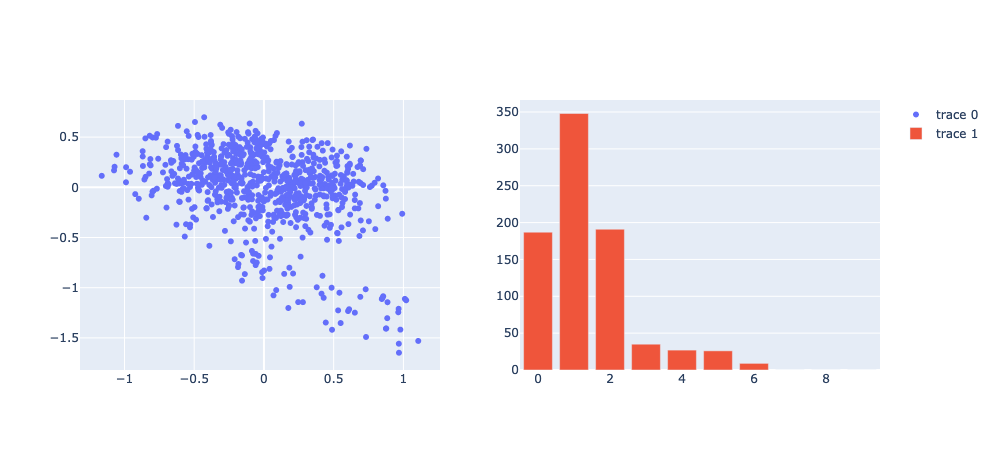

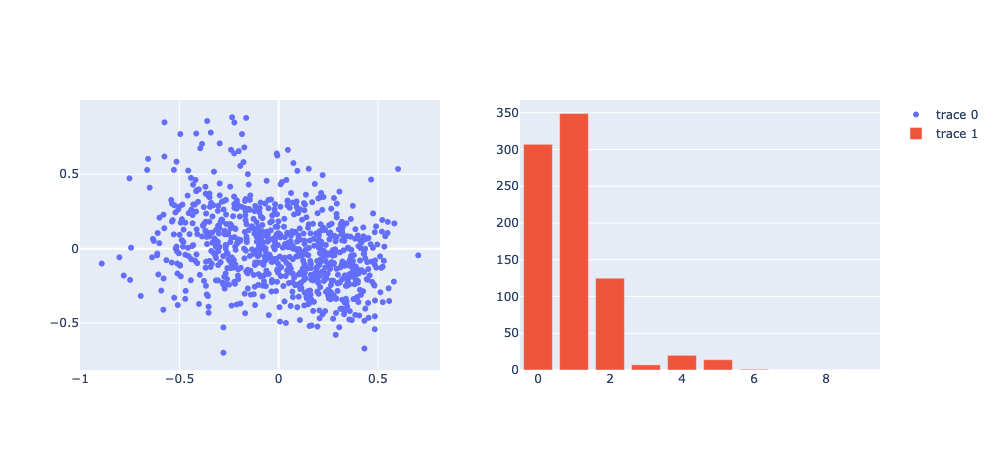

In [72]:
for p in lp:
    V = p['V']
    Y = X.T.dot(V)
    fig = make_subplots(rows=1, cols=2)
    fig.add_trace(go.Scatter(x=Y[:,0], y=Y[:,1], mode="markers", marker=go.scatter.Marker(color=labs)), row=1, col=1)
    fig.add_trace(go.Bar(y=p['histogram']), row=1, col=2)
    fig.show()

In [16]:
dim = list(data)
for a in ap:
    alpha =  a['alpha']
    V = make_basis(X.shape[0], alpha)
    Y = X.T.dot(V)
    t1 = go.Figure(data=[go.Scatter(x=Y[:,0], y=Y[:,1], mode="markers", marker=go.scatter.Marker(color=labs))],
                  layout=go.Layout(
                      xaxis_title=dim[alpha[0]], 
                      yaxis_title=dim[alpha[1]]
                  ))
    f1 = go.FigureWidget(t1)
    
    t2 = go.Figure(data=[go.Bar(y=a['histogram'])])
    f2 = go.FigureWidget(t2)
    display(widgets.HBox([f1, f2]))   

    'data': [{'mode': 'markers',
              'type': 'scatter',
              …

    'data': [{'mode': 'markers',
              'type': 'scatter',
              …

    'data': [{'mode': 'markers',
              'type': 'scatter',
              …

    'data': [{'mode': 'markers',
              'type': 'scatter',
              …

    'data': [{'mode': 'markers',
              'type': 'scatter',
              …

    'data': [{'mode': 'markers',
              'type': 'scatter',
              …